In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import time

import dataset
import myModels
import Metrics
import LossFn

plt.style.use('science')
plt.rcParams['text.usetex'] = False
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

C:\Users\asus\.conda\envs\myTorch_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\asus\.conda\envs\myTorch_gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
params = {
    'paths': os.path.abspath(os.path.join(os.getcwd(),'..')) + '/Datas/Thermal/',
    'inputs_FileName': ['Strains-50-1.xlsx','Strains-50-2.xlsx','Strains-100-1.xlsx','Strains-100-2.xlsx','Strains-120-1.xlsx'],
    'outputs_FileName': ['Loads-50-1.xlsx','Loads-50-2.xlsx','Loads-100-1.xlsx','Loads-100-2.xlsx','Loads-120-1.xlsx'],
    'SampleStride': [1,1,10,10,5],
    'seq_len': 100,
    'input_size': 14,
    'output_size': 6,
    'state':True,
    'Mask':True,
    'Robust_loss':False,
    'Noise_level': 0.0,
    'batch_size': 32,
    'lstm_layers': [50,50],
    'TCN_layers':[25, 50, 50],
    'kernel_size':3,
    'dropout':0.1,
    'Epoches': 1500,
    'lr':0.001,
    'dis_interval':1000,
    'plot_loss':True,
    'device':device,

}


In [102]:
Truths.size()

torch.Size([128, 6])

In [104]:
labels = 0
start = 0
index  = 0
end = None
params['state'] = True
params['Mask'] = True
models_LSTM_TCN = torch.load('LSTM_TCN-1.pt')
Truths,LSTM_TCN = myModels.predict_varylength(models_LSTM_TCN,params,labels,start,end,mask=False)
print ('RI-VLTSNet--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],LSTM_TCN[:,index])))
print ('RI-VLTSNet--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],LSTM_TCN[:,index])))
print ('RI-VLTSNet--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],LSTM_TCN[:,index])))
print ('=========================================================================')

params['state'] = True
params['Mask'] = True
models_LSTM = torch.load('LSTM.pt')
Truths,LSTM = myModels.predict_varylength(models_LSTM,params,labels,start,end,mask=False)
print ('LSTM--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],LSTM[:,index])))
print ('LSTM--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],LSTM[:,index])))
print ('LSTM--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],LSTM[:,index])))
print ('=========================================================================')

params['state'] = True
params['Mask'] = True
models_TCN = torch.load('TCN.pt')
Truths,TCN = myModels.predict_varylength(models_TCN,params,labels,start,end,mask=False)
print ('TCN--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],TCN[:,index])))
print ('TCN--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],TCN[:,index])))
print ('TCN--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],TCN[:,index])))
print ('=========================================================================')

params['state'] = True
params['Mask'] = True
models_TCN_LSTM = torch.load('TCN_LSTM.pt')
Truths,TCN_LSTM = myModels.predict_varylength(models_TCN_LSTM,params,labels,start,end,mask=False)
print ('TCN_LSTM--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],TCN_LSTM[:,index])))
print ('TCN_LSTM--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],TCN_LSTM[:,index])))
print ('TCN_LSTM--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],TCN_LSTM[:,index])))
print ('=========================================================================')

RI-VLTSNet--->RMSE of Test Set: 0.4872004985809326
RI-VLTSNet--->MAPE of Test Set: 0.9911003522574902
RI-VLTSNet--->R2 of Test Set: 0.997241148725152
LSTM--->RMSE of Test Set: 0.35952308773994446
LSTM--->MAPE of Test Set: 0.8002110756933689
LSTM--->R2 of Test Set: 0.9984976664418355
TCN--->RMSE of Test Set: 0.7121415734291077
TCN--->MAPE of Test Set: 1.5277043916285038
TCN--->R2 of Test Set: 0.9941055197268724
TCN_LSTM--->RMSE of Test Set: 0.5063759684562683
TCN_LSTM--->MAPE of Test Set: 1.1095806956291199
TCN_LSTM--->R2 of Test Set: 0.9970197069924325


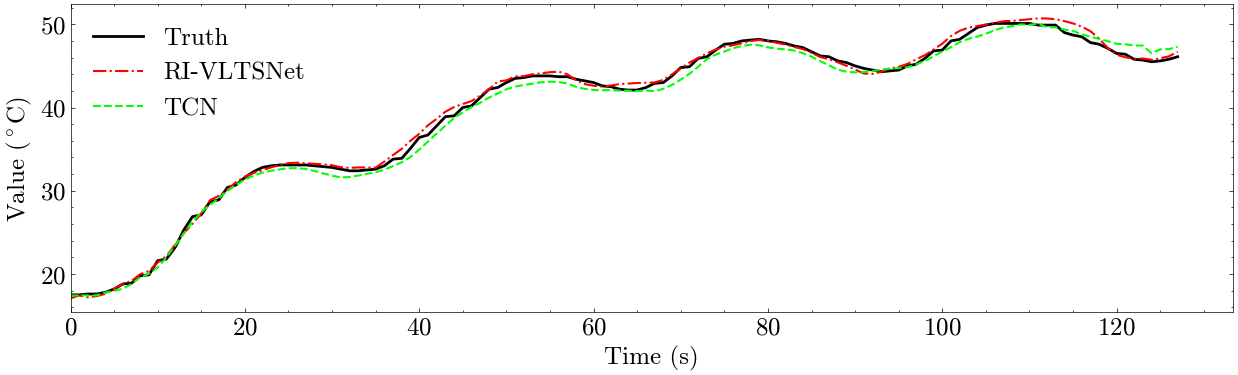

In [101]:
index = 0
plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size': 18})
# 循环绘制每个子图
plt.plot(Truths[:,index],label='Truth',linestyle='-',linewidth =2,color='black')
plt.plot(LSTM_TCN[:,index],label='RI-VLTSNet',linestyle='-.',linewidth =1.5,color='red')
#plt.plot(LSTM[:,index],label='LSTM',linestyle='-.',linewidth =1.5,color='b')
plt.plot(TCN[:,index],label='TCN',linestyle='--',linewidth =1.5,color='lime')
#plt.plot(TCN_LSTM[:,index],label='TCN-LSTM',linestyle=':',linewidth =2,color='m')
plt.ylabel('Value ($^\circ\mathrm{C}$)')
plt.xlabel('Time (s)')
plt.xlim(start,end)
#plt.ylim(20,None)
plt.legend()
plt.show()

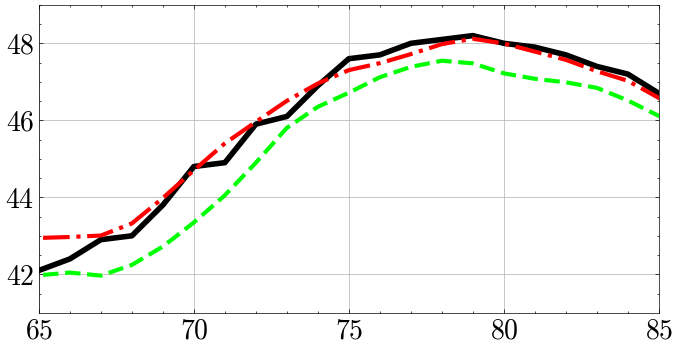

In [100]:
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 20})
# 循环绘制每个子图
plt.plot(Truths[:,index],label='Truth',linestyle='-',linewidth =4,color='black')
plt.plot(LSTM_TCN[:,index],label='RI-VLTSNet',linestyle='-.',linewidth =3,color='red')
#plt.plot(LSTM[:,index],label='LSTM',linestyle='-.',linewidth =3,color='b')
plt.plot(TCN[:,index],label='TCN',linestyle='--',linewidth =3,color='lime')
#plt.plot(TCN_LSTM[:,index],label='TCN-LSTM',linestyle=':',linewidth =4,color='m')
#plt.ylabel('Value ($^\circ\mathrm{C}$)')
#plt.xlabel('Time (s)')
plt.xlim(65,85)
plt.ylim(41,49)
plt.grid(True)
#plt.legend()
plt.show()

In [105]:
labels = 4
start = 0
index  = 0
end = None
params['state'] = True
params['Mask'] = True
models_LSTM_TCN = torch.load('LSTM_TCN-1.pt')
Truths,LSTM_TCN = myModels.predict_varylength(models_LSTM_TCN,params,labels,start,end,mask=False)
print ('RI-VLTSNet--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],LSTM_TCN[:,index])))
print ('RI-VLTSNet--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],LSTM_TCN[:,index])))
print ('RI-VLTSNet--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],LSTM_TCN[:,index])))
print ('=========================================================================')

params['state'] = True
params['Mask'] = True
models_LSTM = torch.load('LSTM.pt')
Truths,LSTM = myModels.predict_varylength(models_LSTM,params,labels,start,end,mask=False)
print ('LSTM--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],LSTM[:,index])))
print ('LSTM--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],LSTM[:,index])))
print ('LSTM--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],LSTM[:,index])))
print ('=========================================================================')

params['state'] = True
params['Mask'] = True
models_TCN = torch.load('TCN.pt')
Truths,TCN = myModels.predict_varylength(models_TCN,params,labels,start,end,mask=False)
print ('TCN--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],TCN[:,index])))
print ('TCN--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],TCN[:,index])))
print ('TCN--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],TCN[:,index])))
print ('=========================================================================')

params['state'] = True
params['Mask'] = True
models_TCN_LSTM = torch.load('TCN_LSTM.pt')
Truths,TCN_LSTM = myModels.predict_varylength(models_TCN_LSTM,params,labels,start,end,mask=False)
print ('TCN_LSTM--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],TCN_LSTM[:,index])))
print ('TCN_LSTM--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],TCN_LSTM[:,index])))
print ('TCN_LSTM--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],TCN_LSTM[:,index])))
print ('=========================================================================')

RI-VLTSNet--->RMSE of Test Set: 1.0125751495361328
RI-VLTSNet--->MAPE of Test Set: 1.4735729433596134
RI-VLTSNet--->R2 of Test Set: 0.998873257660307
LSTM--->RMSE of Test Set: 6.267341136932373
LSTM--->MAPE of Test Set: 9.173977375030518
LSTM--->R2 of Test Set: 0.956834502518177
TCN--->RMSE of Test Set: 0.3309817314147949
TCN--->MAPE of Test Set: 0.38235445972532034
TCN--->R2 of Test Set: 0.9998796134168515
TCN_LSTM--->RMSE of Test Set: 3.298109769821167
TCN_LSTM--->MAPE of Test Set: 3.7750747054815292
TCN_LSTM--->R2 of Test Set: 0.9880463574081659


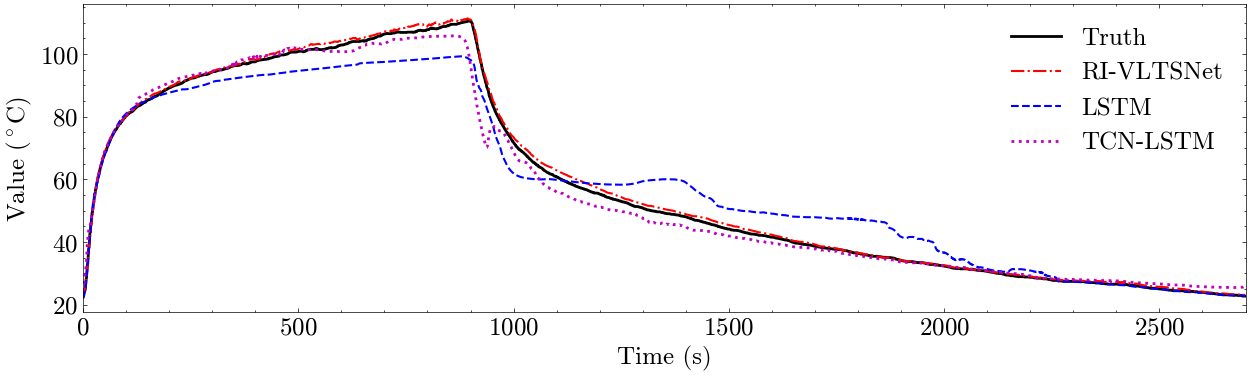

In [109]:
index = 0
plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size': 18})
# 循环绘制每个子图
plt.plot(Truths[:,index],label='Truth',linestyle='-',linewidth =2,color='black')
plt.plot(LSTM_TCN[:,index],label='RI-VLTSNet',linestyle='-.',linewidth =1.5,color='red')
plt.plot(LSTM[:,index],label='LSTM',linestyle='--',linewidth =1.5,color='b')
#plt.plot(TCN[:,index],label='TCN',linestyle='--',linewidth =1.5,color='lime')
plt.plot(TCN_LSTM[:,index],label='TCN-LSTM',linestyle=':',linewidth =2,color='m')
plt.ylabel('Value ($^\circ\mathrm{C}$)')
plt.xlabel('Time (s)')
plt.xlim(start,2700)
#plt.ylim(20,None)
plt.legend()
plt.show()

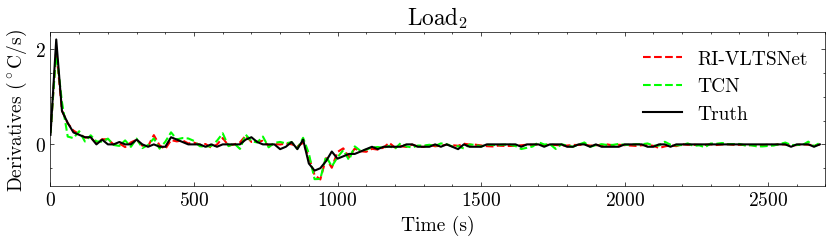

In [326]:
LSTM_TCN_derivatives[::step].shape

(540,)

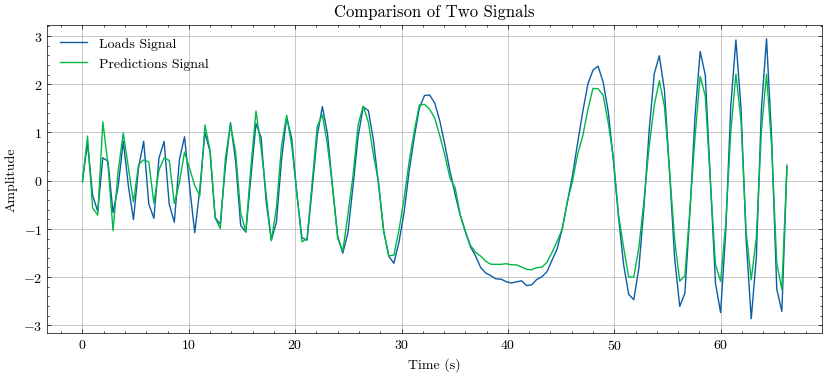

In [7]:
time = np.arange(0, len(loads), downsampling_factor) / 25

# 绘制图像
plt.figure(figsize=(10,4))
plt.plot(time, loads[::downsampling_factor], label='Loads Signal')
plt.plot(time, preds[::downsampling_factor], label='Predictions Signal')

plt.title('Comparison of Two Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#torch.save(models,'LSTM_TCNnoS.pt')

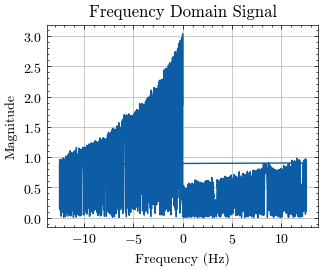

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 time_domain_signal 是你的时域信号数据
# time_domain_signal 是一个包含时域数据的数组

# 进行傅里叶变换
freq_domain_signal = np.fft.fft(loads.cpu().detach().numpy())

# 生成频率轴
n = len(freq_domain_signal)
sampling_rate = 25  # 采样频率为25Hz
freqs = np.fft.fftfreq(n, d=1/sampling_rate)

# 绘制频谱图
plt.plot(freqs, np.abs(freq_domain_signal))
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


Downsampled signal length: 172


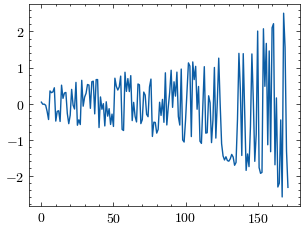

In [33]:
import numpy as np

# 假设原始时域信号为 time_domain_signal
# 假设加载的信号是loads.cpu().detach().numpy()

# 加载信号数据
time_domain_signal = loads.cpu().detach().numpy()

# 初始采样频率为25Hz，目标采样频率为1Hz
initial_sampling_rate = 25
target_sampling_rate = 1

# 计算下采样因子
downsampling_factor = initial_sampling_rate // target_sampling_rate

# 执行下采样
downsampled_signal = time_domain_signal[::downsampling_factor]

# 打印下采样后的信号长度
print("Downsampled signal length:", len(downsampled_signal))
plt.plot(downsampled_signal)